# CIENCIA ANALITICA DE DATOS

Edgar Martinez Anguiano

A01794163 

11/09/2022

PhD Maria de la Paz Rico

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [203]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [204]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [205]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

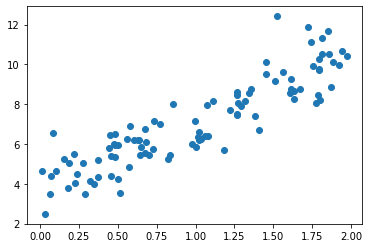

In [206]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [207]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [208]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [209]:
#X_fit[]

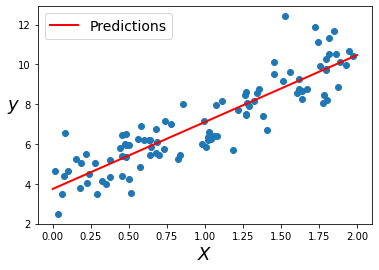

In [210]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [211]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [212]:
X_new.shape

(2, 1)

In [213]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [214]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [215]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [216]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

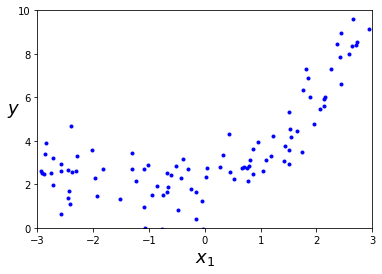

In [217]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [218]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [219]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [220]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [221]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [222]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [223]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

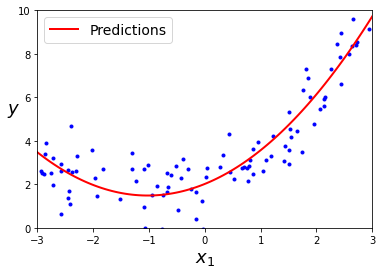

In [224]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [225]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [226]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [227]:
len(X)

1000

In [228]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

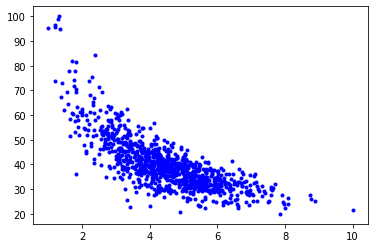

In [229]:
plt.plot(X,y,'b.')

In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
#Divide los datos del costo manufactura
print(f'Numero total de registros DB: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros DB: 1000
**************************************************
Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)
**************************************************
Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


In [231]:
from sklearn.linear_model import LinearRegression
#Regresion lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
X_fit= X_test
y_fit= linear_reg.predict(X_fit)
linear_reg


LinearRegression()

In [232]:
 #Ecuacion
 Coef_lin, Coef_inter= linear_reg.coef_, linear_reg.intercept_
 print('Ecuación: y=',round(Coef_lin[0],2),'X +',round(Coef_inter,2))

Ecuación: y= -5.99 X + 66.84


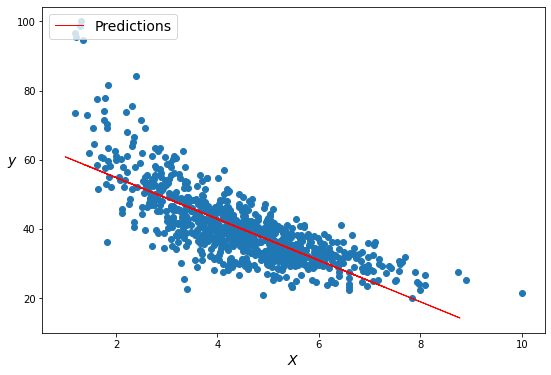

In [233]:
#Visualizacion
plt.figure(figsize= (9,6))
plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=1, label="Predictions")
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14);

In [234]:
#Errores y R2

from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_fit))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_fit)))
print('R2_score',r2_score(y_test, y_fit))

Error medio Absoluto (MAE): 5.013587781954963
Root Mean Squared Error: 7.108963321847682
R2_score 0.6116251549562579


In [235]:
#polinomial

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_poly = pd.DataFrame(X_poly)
X_poly.columns= ['A0', 'A1']

print(X_poly)

           A0         A1
0    7.974248  63.588625
1    1.895731   3.593795
2    3.576501  12.791362
3    5.561688  30.932371
4    3.278806  10.750566
..        ...        ...
895  4.688092  21.978206
896  5.692784  32.407790
897  3.940463  15.527249
898  4.524484  20.470958
899  5.868144  34.435108

[900 rows x 2 columns]


In [236]:

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_poly=pd.DataFrame(X_poly)
X_poly.columns= ['A0','A1']
print('X_poly:')
display(pd.DataFrame(X_poly))
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)

X_poly:


,A0,A1
0,7.974248,63.588625
1,1.895731,3.593795
2,3.576501,12.791362
3,5.561688,30.932371
4,3.278806,10.750566
...,...,...
895,4.688092,21.978206
896,5.692784,32.407790
897,3.940463,15.527249
898,4.524484,20.470958


LinearRegression()

In [237]:
Coef_lin, Coef_int= lin_reg.coef_, lin_reg.intercept_
print('Ecuacion: y=', round(Coef_lin[0],2),'X +', round(Coef_lin[1],2),'X² +',round(Coef_int,2))

Ecuacion: y= -16.41 X + 1.13 X² + 88.8


In [238]:
X_new_poly= poly_features.transform(X_test)
X_new_poly= pd.DataFrame(X_new_poly)
X_new_poly.columns= ['A0', 'A1']
print('X_new_poly:')
display(pd.DataFrame(X_new_poly))
y_new_poly= lin_reg.predict(X_new_poly)


X_new_poly:


,A0,A1
0,4.591665,21.083388
1,3.769674,14.210442
2,2.866500,8.216821
3,5.684718,32.316014
4,3.294658,10.854769
...,...,...
95,3.514743,12.353416
96,4.225077,17.851272
97,5.484125,30.075626
98,4.126948,17.031698


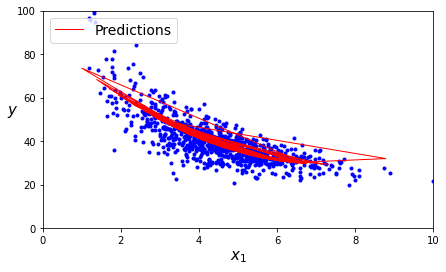

In [239]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.figure(figsize=(7,4))
plt.plot(X_train, y_train, "b.")
plt.plot(X_test, y_new_poly, "r-", linewidth=1, label="Predictions")
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

In [240]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_new_poly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_new_poly)))
print('R2_score',r2_score(y_test, y_new_poly))

Error medio Absoluto (MAE): 4.3833025759681075
Root Mean Squared Error: 5.832771301068423
R2_score 0.7385501224942537


In [241]:
from sklearn.linear_model import Ridge


In [242]:
RR = Ridge(alpha=0.1)
RR_Ajuste=RR.fit(X_train,y_train)
RR_Ajuste

Ridge(alpha=0.1)

In [243]:
RR_Ajuste.coef_, RR_Ajuste.intercept_

(array([-5.98844997]), 66.83482072458477)

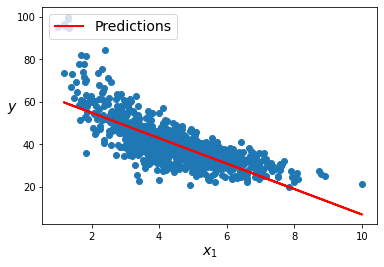

In [244]:
y_ajuste = RR_Ajuste.predict(X_train)

plt.scatter(X, y)
plt.plot(X_train, y_ajuste, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14);

In [245]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_ajuste))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_ajuste)))
print('R2_score',r2_score(y_train, y_ajuste))

Error medio Absoluto (MAE): 4.90528051258557
Root Mean Squared Error: 6.844866102035354
R2_score 0.5746524626629732


In [246]:
from sklearn.linear_model import Lasso

RL = Lasso(alpha=0.1)
RL_Ajuste= RL.fit(X_train,y_train)
RL_Ajuste

Lasso(alpha=0.1)

In [247]:
RL_Ajuste.coef_, RL_Ajuste.intercept_

(array([-5.93216494]), 66.58301628789998)

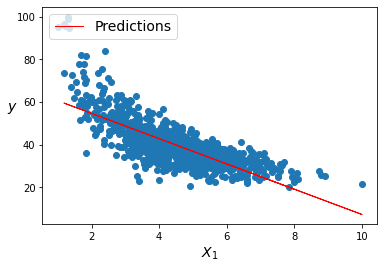

In [248]:
y_pred = RL_Ajuste.predict(X_train)

plt.scatter(X, y)
plt.plot(X_train, y_pred, "r-", linewidth=1, label="Predictions")
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14);

In [249]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.897735501223266
Root Mean Squared Error: 6.845279972999565
r2_score 0.5746010243105417


In [250]:
modelos=('Regresion Lineal', 'Regresion Polinomial', 'Ridge', 'Lasso')

errormae=(metrics.mean_absolute_error(y_test, y_fit),
          metrics.mean_absolute_error(y_test, y_new_poly),
          metrics.mean_absolute_error(y_train, y_ajuste),
          metrics.mean_absolute_error(y_train, y_pred))

rcuadrada=(r2_score(y_test, y_fit),
          r2_score(y_test, y_new_poly),
          r2_score(y_train, y_ajuste),
          r2_score(y_train, y_pred))

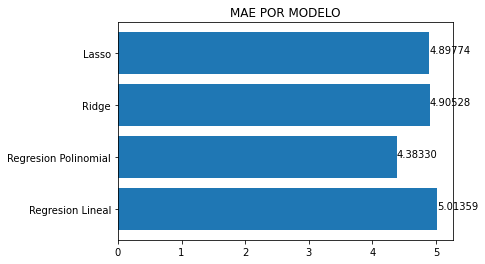

In [251]:
plt.barh(modelos, errormae)
plt.title('MAE POR MODELO')
for index, value in enumerate(errormae):
    plt.text(value, index,
             str('{:.5f}'.format(value)))

plt.show()

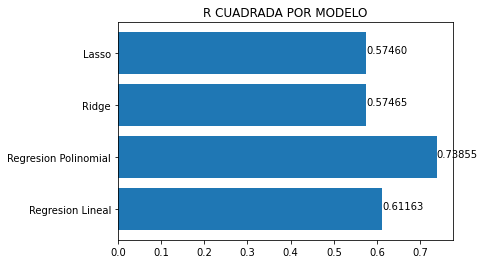

In [252]:
plt.barh(modelos, rcuadrada)
plt.title('R CUADRADA POR MODELO')
for index, value in enumerate(rcuadrada):
    plt.text(value, index,
             str('{:.5f}'.format(value)))

plt.show()

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [274]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19449,7504001430,20141023T000000,539000.0,3,1.50,1740,12000,2.0,0,0,...,9,1740,0,1974,0,98074,47.6276,-122.053,2580,12224
3173,8651511220,20141217T000000,490000.0,3,2.50,1890,10190,2.0,0,0,...,8,1890,0,1986,0,98074,47.6478,-122.061,2080,9794
16802,6646200280,20140715T000000,561600.0,4,2.50,2350,6624,2.0,0,0,...,9,2350,0,1990,0,98074,47.6262,-122.045,2590,11240
19611,5104511250,20140613T000000,540000.0,5,3.00,3610,9775,2.0,0,0,...,8,3610,0,2003,0,98038,47.3545,-122.011,2800,8582
3702,3738900165,20141024T000000,385000.0,4,1.75,2080,8215,2.0,0,0,...,7,2080,0,1948,0,98155,47.7370,-122.305,1550,8215
16557,3023059071,20150210T000000,631000.0,4,4.00,2630,59586,1.0,0,0,...,7,1470,1160,1963,0,98055,47.4496,-122.209,2230,5715
18248,9388100015,20141119T000000,740000.0,3,2.50,2710,18480,2.0,0,2,...,10,2000,710,1978,0,98034,47.7256,-122.259,2710,18077
784,686500030,20141202T000000,650000.0,6,2.75,3610,10003,1.5,0,0,...,8,3610,0,1966,0,98008,47.6261,-122.125,2560,10004
7496,1722069052,20141024T000000,565000.0,5,2.50,4320,107157,1.0,0,0,...,8,2160,2160,1967,0,98038,47.4009,-122.059,2480,107157
8432,2599001500,20140712T000000,235000.0,3,1.75,1420,7920,1.0,0,0,...,7,1420,0,1962,0,98092,47.2931,-122.188,1420,7920


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [276]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [281]:
from sklearn.preprocessing import StandardScaler

nombres = X.columns
scaler = StandardScaler()
X_escale = scaler.fit_transform(X)
X_escale = pd.DataFrame(X_escale, columns=nombres)

X_escale.describe().round(3)

,Number of Units
count,1000.000
mean,0.000
std,1.001
min,-2.600
25%,-0.658
50%,-0.028
75%,0.638
max,4.138


In [278]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


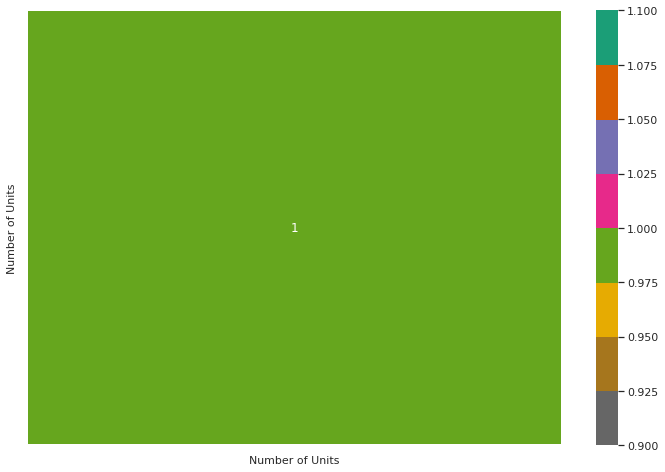

In [286]:
plt.figure(figsize=(12,8)) 
sns.heatmap(X_escale.corr(), annot=True, cmap='Dark2_r', linewidths = 1)
plt.show()

In [287]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10) 
X_2 = pca.fit_transform(X_escale) 

componentes = pca.explained_variance_ratio_

x=0
for i in componentes:
  print("El porcentaje de variación explicada por PC",x," es:",round(i*100,3))
  x=x+1

ValueError: ignored

In [285]:
nombres = X_escale.columns
for i in (0,1,2,3,4,5):
  df_pc = pd.DataFrame(pca.components_[i],nombres,columns=["val"])
  print(df_pc.sort_values('val',ascending=False).head(12))

AttributeError: ignored

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

In [ ]:
from sklearn.pipeline import Pipeline

mlr_pipe = Pipeline([('Normalizar',StandardScaler()),('Modelo',LinearRegression())])
mlr_pipe.fit(X_train, y_train)

In [ ]:
ecuacion = "Y ="
for i in range(0,14):
  ecuacion = ecuacion + "+" + str(round(mlr_pipe.named_steps['Modelo'].coef_[0][i],3)) + "*X"+str(i+1)
ecuacion

In [ ]:
y_test_hat = mlr_pipe.predict(X_test)

rmse_mlr = mean_squared_error(y_test, y_test_hat,squared=False)
mae_mlr = mean_absolute_error(y_test, y_test_hat)
r2_mlr = r2_score(y_test, y_test_hat)

print(f"El error (rmse) es: {round(rmse_mlr,3)}")
print(f"El mae es: {round(mae_mlr,3)}")
print(f"La R2 es: {round(r2_mlr,3)}")